# Variable Notes Titanic Dataset

- pclass: A proxy for socio-economic status (SES)
    + 1st = Upper
    + 2nd = Middle
    + 3rd = Lower

- Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and finance were ignored)

- parch: The dataset defines family relations in this way... Parent: mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch = 0 for them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import warnings

In [2]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('whitegrid')
sns.set_palette('husl')

## Read data

In [3]:
df = pd.read_csv('C:/AIO_LAB/AIO-2025/AI_Exercises/Data_Visualization/lesson/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
print(f"Shape: {df.shape}")

Shape: (891, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Preprocessing

### Handle Mising Value

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [9]:
# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [11]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [12]:
df = df.drop(['Cabin'], axis=1)

In [13]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Feature Engineering

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [15]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mile', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 120], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,Mr,2,0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,Mrs,2,0,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S,Miss,1,1,Adult,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S,Mrs,2,0,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,Mr,1,1,Adult,Mid


In [19]:
# Convert categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Title', 'Embarked', 'AgeBin', 'FareBin'], drop_first=True)

# Drop unnecessary columns 
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')

In [20]:
print("\nAfter Cleaning:")
print(f"New Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())


After Cleaning:
New Shape: (891, 23)

First 5 rows:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,AgeBin_Teen,AgeBin_Adult,AgeBin_Middle,AgeBin_Senior,FareBin_Mid,FareBin_High,FareBin_Very High
0,0,3,0,22.00,1,0,7.25,2,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False
1,1,1,1,38.00,1,0,71.28,2,0,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2,1,3,1,26.00,0,0,7.92,1,1,True,False,False,False,False,False,True,False,True,False,False,True,False,False
3,1,1,1,35.00,1,0,53.10,2,0,False,False,False,True,False,False,True,False,True,False,False,False,False,True
4,0,3,0,35.00,0,0,8.05,1,1,False,False,True,False,False,False,True,False,True,False,False,True,False,False



Missing Values After Cleaning:
0


### Statistic

In [21]:
# Correlation analysis
print("\nCorrelation Matrix:")
corr = df.corr()
display(corr['Survived'].sort_values(ascending=False))


Correlation Matrix:


Survived             1.00
Sex                  0.54
Title_Mrs            0.34
Title_Miss           0.33
Fare                 0.26
FareBin_Very High    0.23
FareBin_High         0.08
Parch                0.08
Title_Mlle           0.06
FamilySize           0.02
AgeBin_Middle        0.01
Embarked_Q           0.00
AgeBin_Teen         -0.00
Title_Rare          -0.01
SibSp               -0.04
AgeBin_Senior       -0.05
AgeBin_Adult        -0.05
Age                 -0.06
FareBin_Mid         -0.10
Embarked_S          -0.15
IsAlone             -0.20
Pclass              -0.34
Title_Mr            -0.55
Name: Survived, dtype: float64

In [23]:
# Statistical tests
print("\nStatistical Tests:")
print("\nT-test for Age vs Survival:")
survived_age = df[df['Survived'] == 1]['Age']
not_survived_age = df[df['Survived'] == 0]['Age']
print(stats.ttest_ind(survived_age, not_survived_age, nan_policy='omit'))


Statistical Tests:

T-test for Age vs Survival:
TtestResult(statistic=np.float64(-1.9394659179476366), pvalue=np.float64(0.0527606884758555), df=np.float64(889.0))


In [24]:
print("\nChi-square Test for Sex vs Survival:")
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(stats.chi2_contingency(contingency_table))


Chi-square Test for Sex vs Survival:
Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[355.52525253, 221.47474747],
       [193.47474747, 120.52525253]]))


In [25]:
# Outlier detection
print("\nOutlier Detection (Fare):")
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")


Outlier Detection (Fare):
Number of outliers: 116


## Visualization

### Distribution

Text(0, 0.5, 'Count')

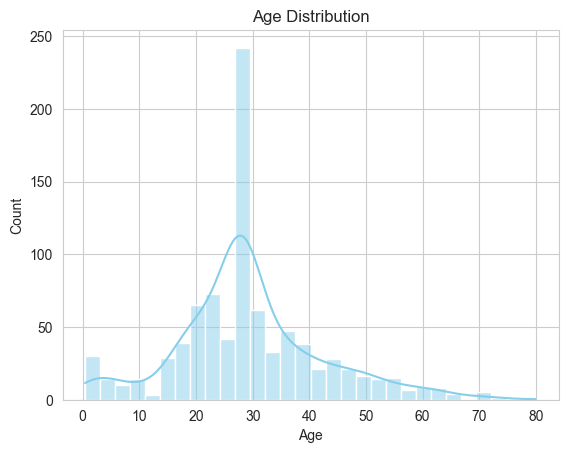

In [26]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

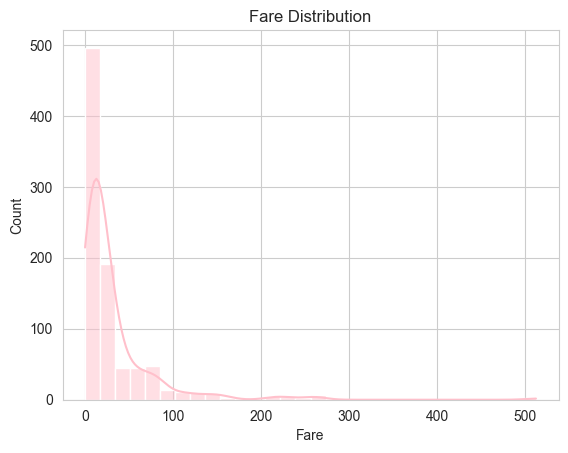

In [27]:
# Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True, color='pink')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

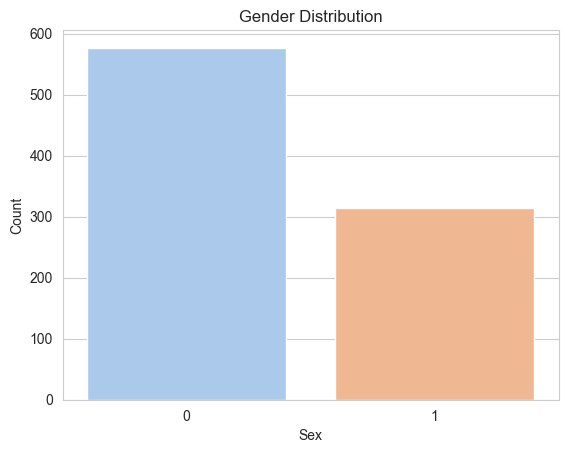

In [29]:
# Sex Distribution
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

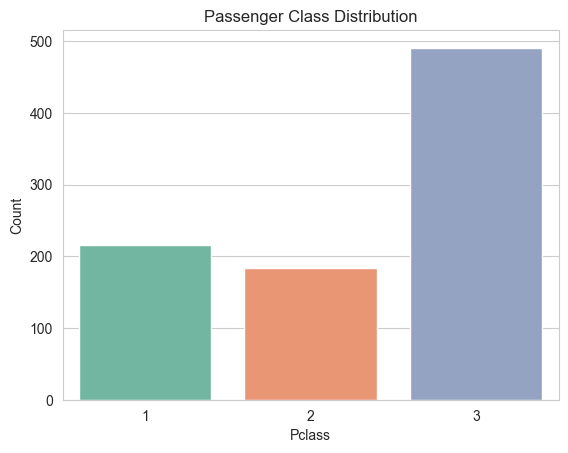

In [30]:
# Pclass Distribution
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')

### Gather Figures

Text(0, 0.5, 'Count')

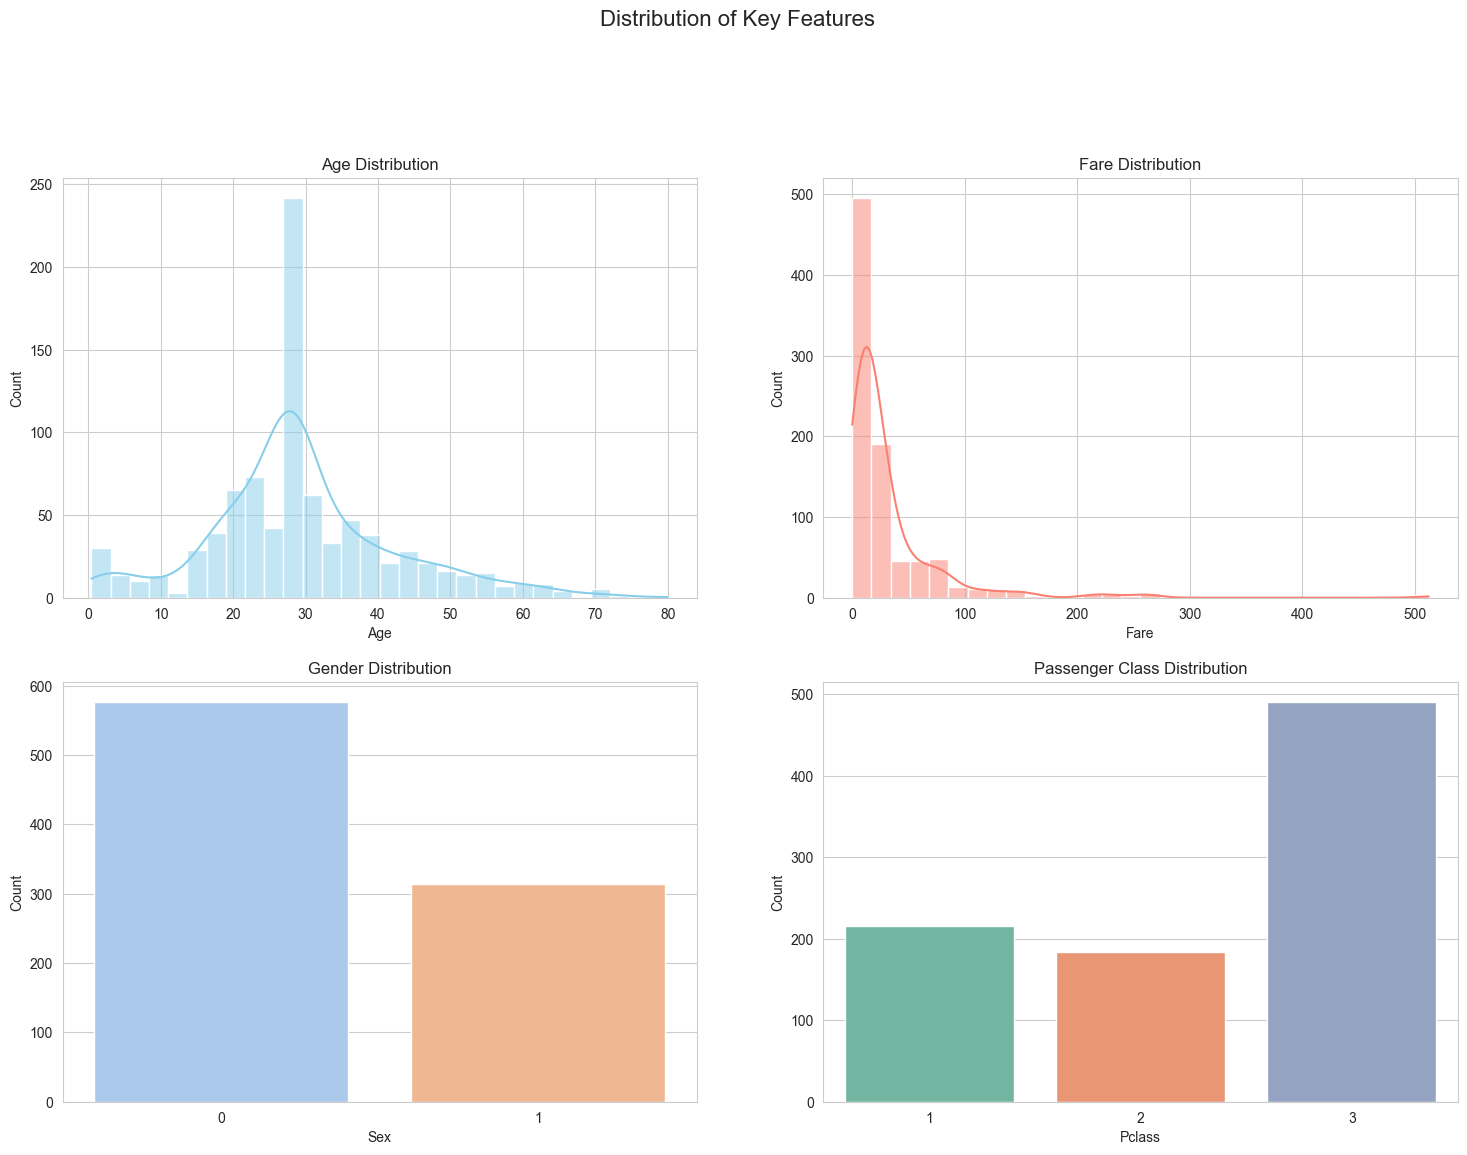

In [31]:
# Setup
plt.figure(figsize=(18, 12))
plt.suptitle("Distribution of Key Features", fontsize=16, y=1.02)

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Fare Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')

# Sex Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# Pclass Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')

### Ty le song sot

In [32]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mlle', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Embarked_Q', 'Embarked_S', 'AgeBin_Teen',
       'AgeBin_Adult', 'AgeBin_Middle', 'AgeBin_Senior', 'FareBin_Mid',
       'FareBin_High', 'FareBin_Very High'],
      dtype='object')

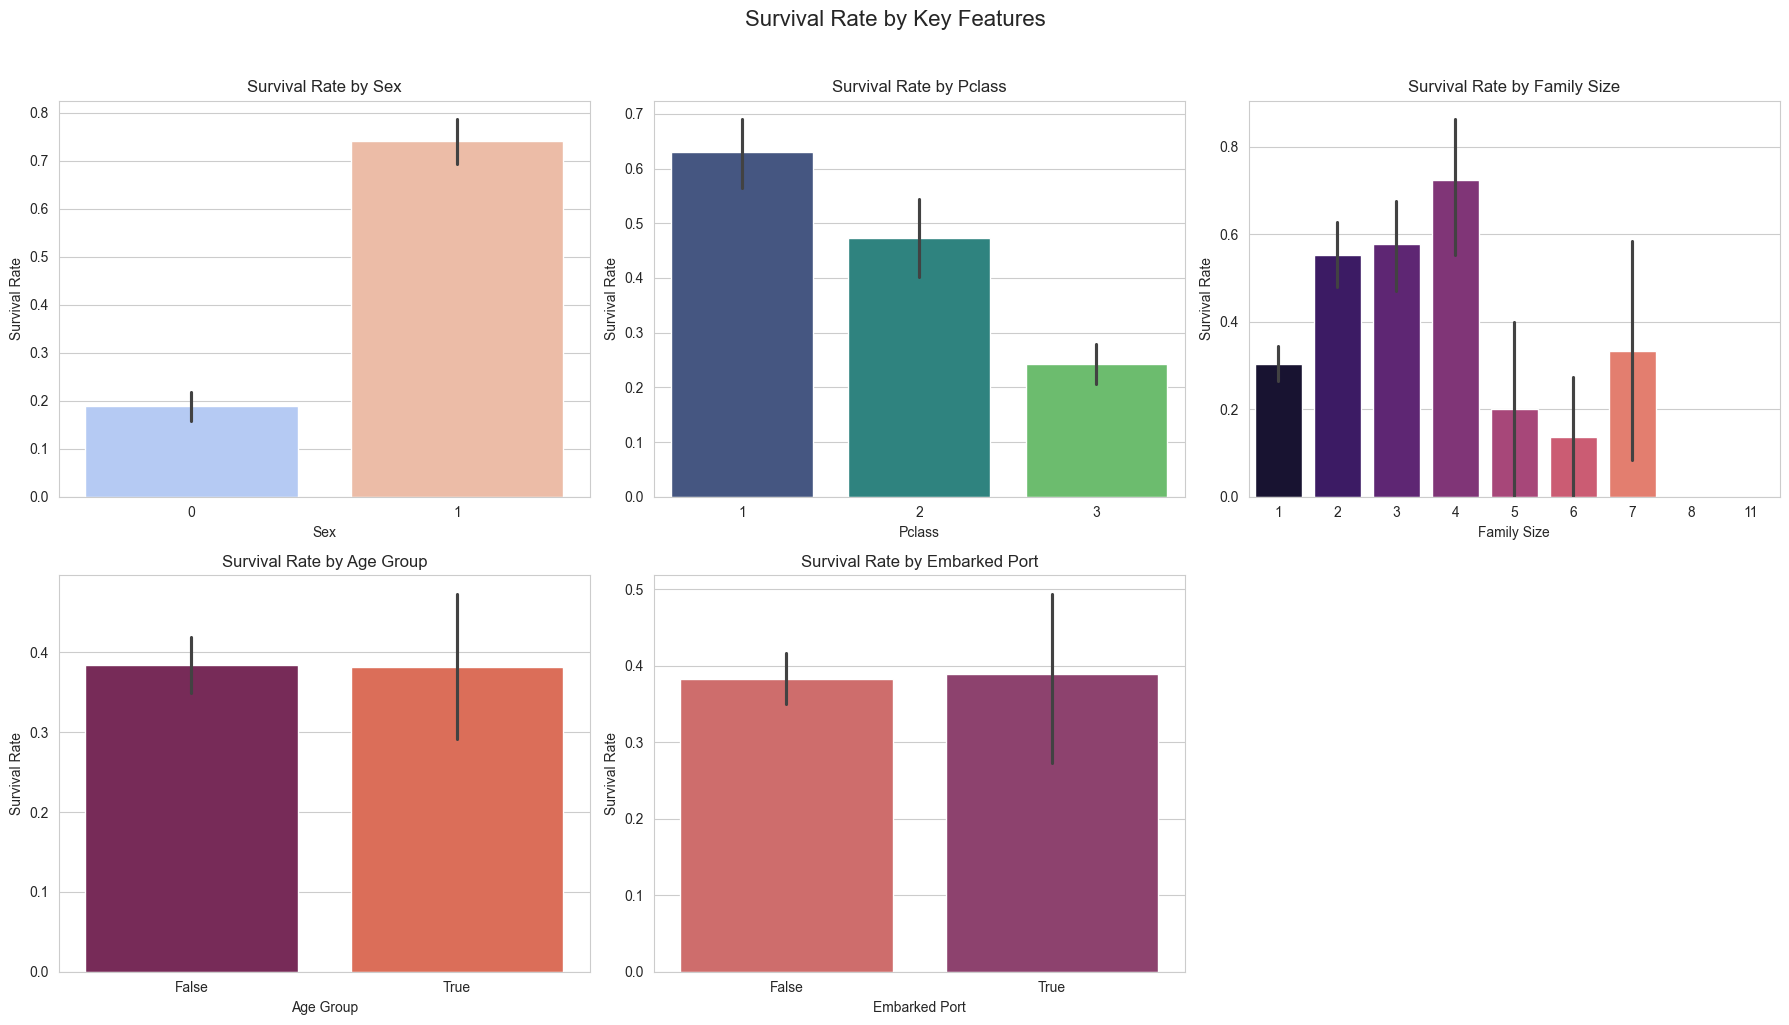

In [33]:
plt.figure(figsize=(18, 10))
plt.suptitle("Survival Rate by Key Features", fontsize=16, y=1.02)

# Ty le song sot theo gender
plt.subplot(2, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Ty le song sot theo hang ve
plt.subplot(2, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

# Tỷ lệ sống sót theo số người thân đi cùng
plt.subplot(2, 3, 3)
sns.barplot(x='FamilySize', y='Survived', data=df, palette='magma')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# Tỷ lệ sống sót theo nhóm tuổi
plt.subplot(2, 3, 4)
sns.barplot(x='AgeBin_Teen', y='Survived', data=df, palette='rocket')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Tỷ lệ sống sót theo cảng lên tàu
plt.subplot(2, 3, 5)
sns.barplot(x='Embarked_Q', y='Survived', data=df, palette='flare')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

### Multivariate

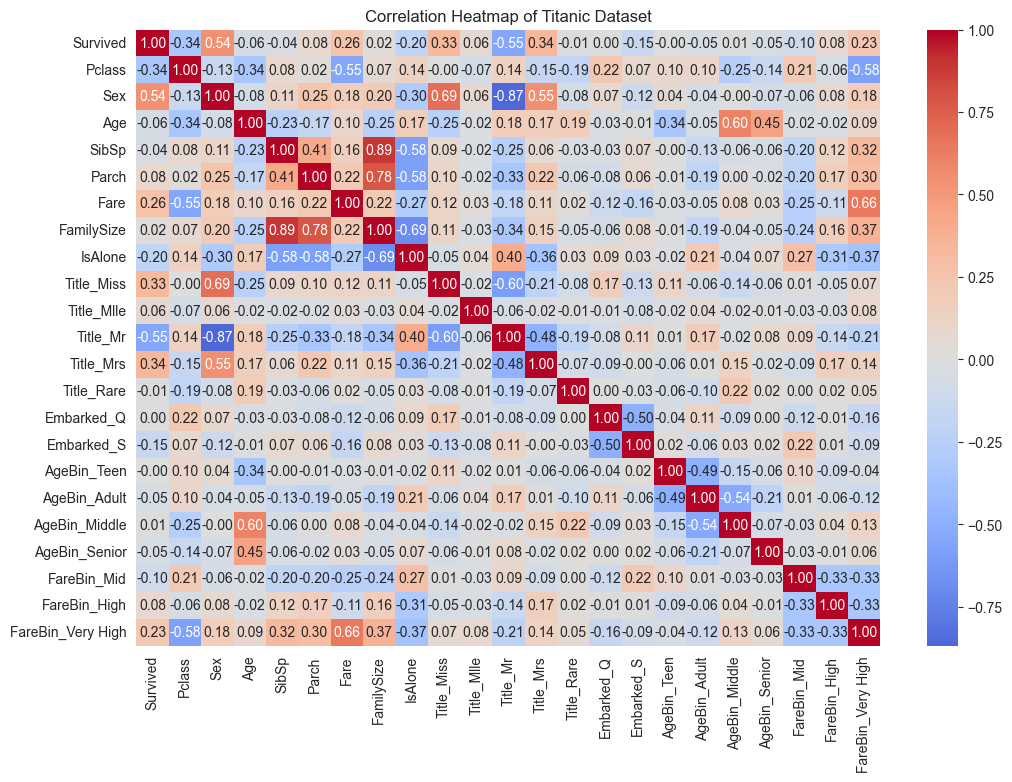

In [34]:
# Heatmap 
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

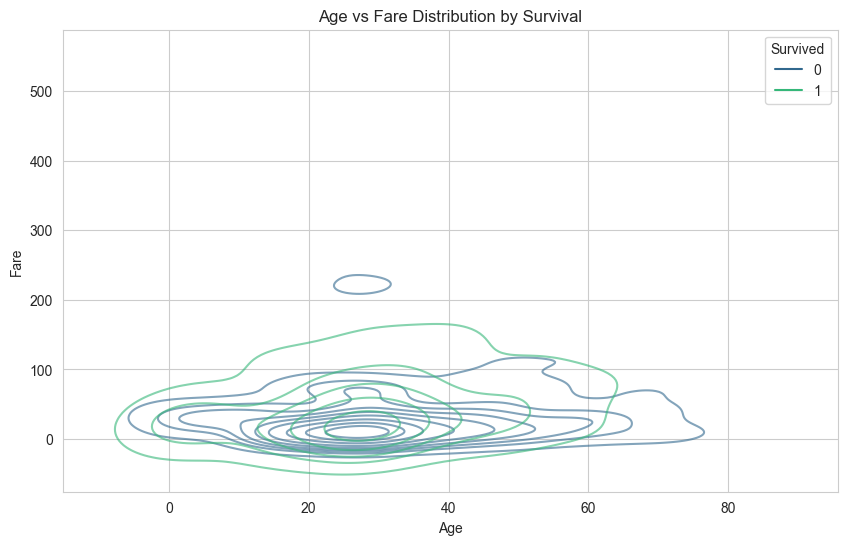

In [35]:
# Age vs Fare Distribution by Survival (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', y='Fare', hue='Survived', palette='viridis', alpha=0.6)
plt.title('Age vs Fare Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

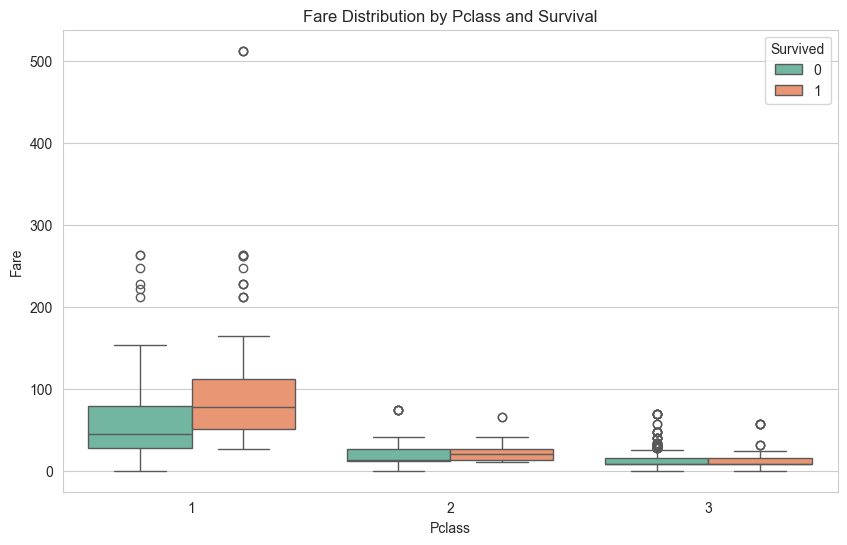

In [36]:
# Fare Distribution by Pclass and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Pclass and Survival')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

### Advanced

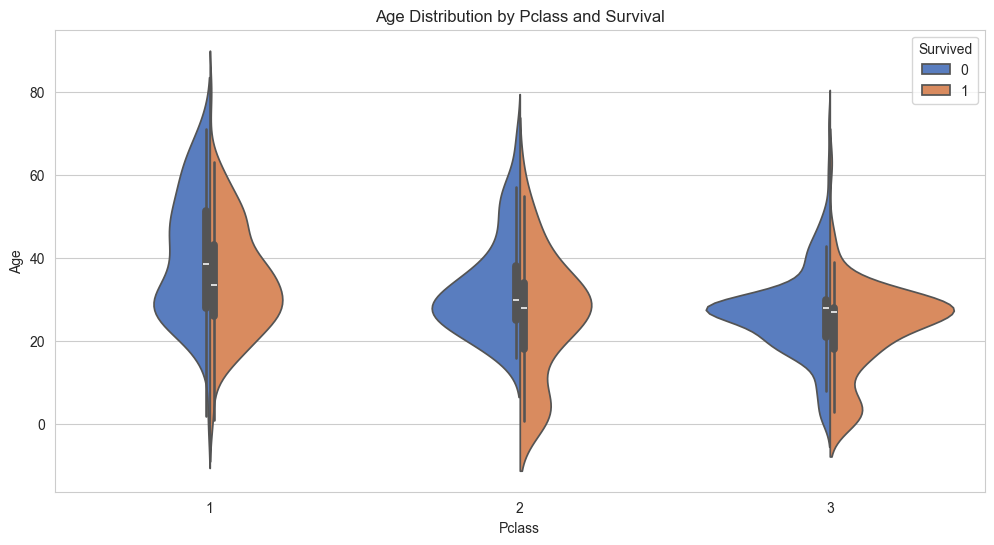

In [37]:
# Age Distribution by Pclass and Survival
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='muted')
plt.title('Age Distribution by Pclass and Survival')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

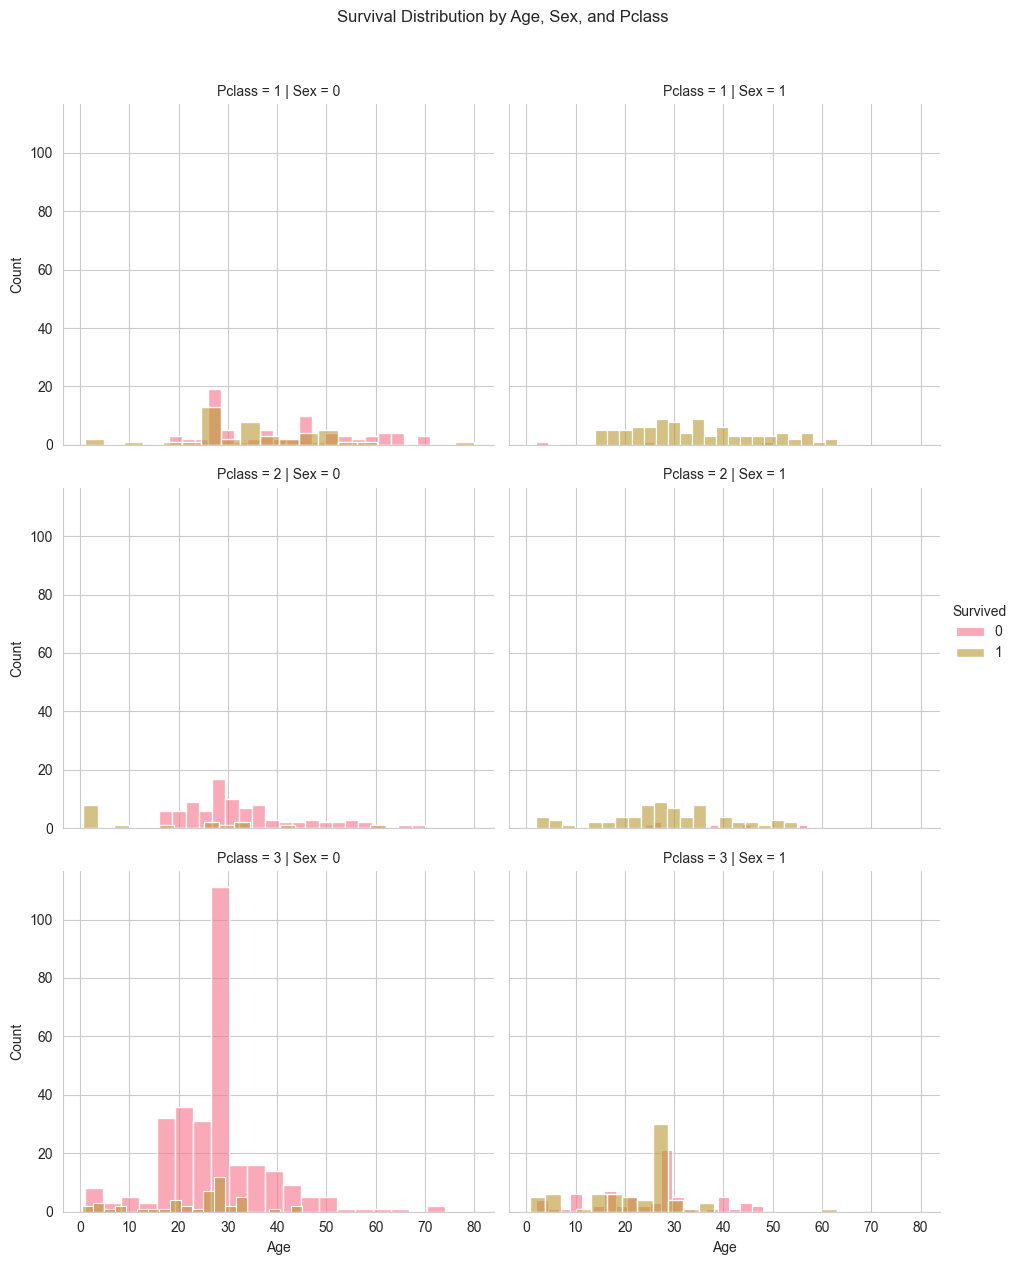

In [38]:
# Survival Distribution by Age, Sex, and Pclass
g = sns.FacetGrid(df, col='Sex', row='Pclass', hue='Survived', height=4, aspect=1.2)
g.map(sns.histplot, 'Age', alpha=0.6, bins=20)
g.add_legend()
plt.suptitle('Survival Distribution by Age, Sex, and Pclass', y=1.05)
plt.show()

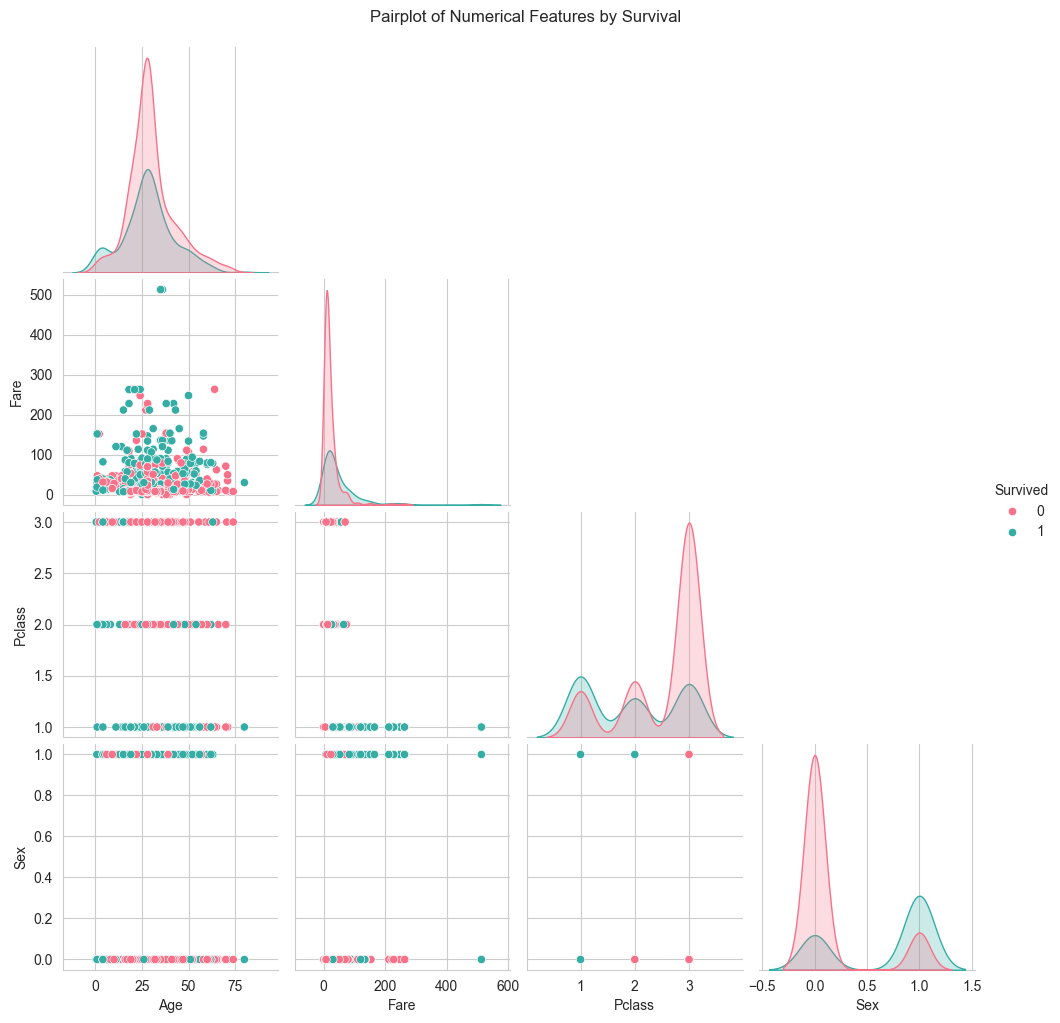

In [39]:
# Pairplot of Numerical Features by Survival
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived', 'Sex']], hue='Survived', corner=True, palette='husl')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()